In [1]:
import os
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

pd.options.display.max_rows = 20
sns.set(style="darkgrid")
%matplotlib inline

### Download the data

In [3]:
from ast import literal_eval
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

/Users/tiffanysung/anaconda2/envs/py36/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
airplane = np.load('/Users/tiffanysung/Documents/APM/reduce/airplane.npy')
alarmclock = np.load('/Users/tiffanysung/Documents/APM/reduce/alarm clock.npy')
ambulance = np.load('/Users/tiffanysung/Documents/APM/reduce/ambulance.npy')
angel = np.load('/Users/tiffanysung/Documents/APM/reduce/angel.npy')
animalmigration = np.load('/Users/tiffanysung/Documents/APM/reduce/animal migration.npy')

In [17]:
airplane = np.c_[airplane, np.zeros(len(airplane))]
alarmclock = np.c_[alarmclock, np.ones(len(alarmclock))]
ambulance = np.c_[ambulance, 2*np.ones(len(ambulance))]
angel = np.c_[angel, 3*np.ones(len(angel))]
animalmigration = np.c_[animalmigration, 4*np.ones(len(animalmigration))]

In [18]:
# store the label codes in a dictionary
label_dict = {0:'airplane', 1:'alarmclock', 2:'ambulance', 3:'angel', 4:'animalmigration'}

In [19]:
print (airplane.shape)
print (alarmclock.shape)
print (ambulance.shape)
print (angel.shape)
print (animalmigration.shape)

(151623, 785)
(123399, 785)
(148004, 785)
(149736, 785)
(137847, 785)


First, further split our reduce dataset into train and test set

In [20]:
X = np.concatenate((airplane[:10000,:-1], alarmclock[:10000,:-1], ambulance[:10000,:-1], angel[:10000,:-1], animalmigration[:10000,:-1]), axis=0).astype('float32') # all columns but the lastt
y = np.concatenate((airplane[:10000,-1], alarmclock[:10000,-1], ambulance[:10000,-1], angel[:10000,-1], animalmigration[:10000,-1]), axis=0).astype('float32') # the last column

X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.5,random_state=0)

### Random Forest Classifier

In [22]:
%%time
parameters = {'n_estimators': [10,20,40,60,80,100,120,140,160]}

clf_rf = RandomForestClassifier(n_jobs=-1, random_state=0)
rf = GridSearchCV(clf_rf, parameters, n_jobs=-1)
rf.fit(X_train, y_train)

results = pd.DataFrame(rf.cv_results_)

CPU times: user 1min 19s, sys: 903 ms, total: 1min 20s
Wall time: 1min 10s


In [23]:
results.sort_values('mean_test_score', ascending = False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
8,23.653950,0.265854,0.83548,1.00000,160,{u'n_estimators': 160},1,0.840571,1.000000,0.832333,1.00000,0.833533,1.00000,3.050225,0.012557,0.003634,0.000000
7,26.989686,0.290116,0.83408,1.00000,140,{u'n_estimators': 140},2,0.838412,1.000000,0.831853,1.00000,0.831973,1.00000,0.675612,0.066238,0.003064,0.000000
6,24.025324,0.165225,0.83292,1.00000,120,{u'n_estimators': 120},3,0.839851,1.000000,0.829453,1.00000,0.829453,1.00000,0.256545,0.048716,0.004902,0.000000
5,19.281218,0.136384,0.83176,1.00000,100,{u'n_estimators': 100},4,0.838052,1.000000,0.830053,1.00000,0.827172,1.00000,0.269152,0.002540,0.004603,0.000000
4,14.769533,0.151273,0.82792,1.00000,80,{u'n_estimators': 80},5,0.832893,1.000000,0.823452,1.00000,0.827412,1.00000,0.426165,0.008829,0.003871,0.000000
3,10.335266,0.139150,0.82464,1.00000,60,{u'n_estimators': 60},6,0.830734,1.000000,0.821171,1.00000,0.822012,1.00000,0.517515,0.005071,0.004324,0.000000
2,5.439294,0.132949,0.81604,0.99996,40,{u'n_estimators': 40},7,0.822817,1.000000,0.813730,0.99994,0.811570,0.99994,0.292428,0.001404,0.004873,0.000028
1,2.233324,0.130276,0.79540,0.99964,20,{u'n_estimators': 20},8,0.801464,0.999760,0.791047,0.99976,0.793687,0.99940,0.134600,0.002297,0.004422,0.000170
0,1.015711,0.191050,0.75796,0.99538,10,{u'n_estimators': 10},9,0.759717,0.995379,0.753841,0.99532,0.760322,0.99544,0.064985,0.050388,0.002923,0.000049


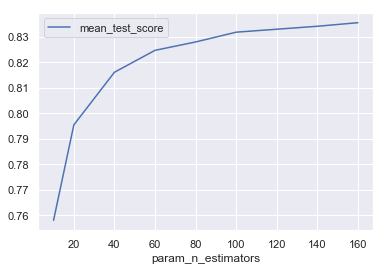

In [24]:
results.plot('param_n_estimators','mean_test_score');

In [25]:
%%time

clf_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print ('random forest accuracy: ',acc_rf)

('random forest accuracy: ', 0.82912)
CPU times: user 22.5 s, sys: 203 ms, total: 22.7 s
Wall time: 3.53 s


### KNN Classifier

In [ ]:
%%time 

tuning_parameters = {'n_neighbors': [1,3,5,7,9,11]}

clf_knn = KNeighborsClassifier(n_jobs=-1)
knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
knn.fit(X_train, y_train)

results_knn = pd.DataFrame(knn.cv_results_)
results_knn.sort_values('mean_test_score', ascending = False)

In [16]:
%%time 

best_clf_knn = KNeighborsClassifier(n_neighbors = 5 ,n_jobs=-1)
best_clf_knn.fit(X_train, y_train)
y_pred_knn = best_clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('KNN accuracy: ',acc_knn)

('KNN accuracy: ', 0.87524)
CPU times: user 17min 4s, sys: 2.38 s, total: 17min 7s
Wall time: 2min 23s


### MLP Classifier

In [60]:
#CV search
tuning_parameaters = {'hidden_layer_sizes' : [(50,), (100,), (784,), (50,50), (100,100), (784,784), (50,50,50), (100,100,100)], 
                     'alpha' : list(10.0 ** -np.arange(1, 7))}

clf_mlp = MLPClassifier(random_state=0)
mlp = GridSearchCV(clf_mlp, param_grid=tuning_parameaters, n_jobs=-1)
mlp.fit(X_train, y_train)
results=pd.DataFrame(mlp.cv_results_)
results.sort_values('mean_test_score', ascending = False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
18,112.619704,0.335776,0.87440,0.999800,0.001,"(784,)","{u'alpha': 0.001, u'hidden_layer_sizes': (784,)}",1,0.878239,0.999880,0.876020,0.999940,0.868939,0.999580,17.632588,0.036712,0.003966,0.000157
26,110.268448,0.315826,0.87264,0.999780,0.0001,"(784,)","{u'alpha': 0.0001, u'hidden_layer_sizes': (784,)}",2,0.878479,0.999880,0.873860,0.999940,0.865578,0.999520,24.472031,0.045331,0.005337,0.000185
42,110.449057,0.311192,0.87216,0.999720,1e-06,"(784,)","{u'alpha': 1e-06, u'hidden_layer_sizes': (784,)}",3,0.875720,0.999760,0.873620,0.999940,0.867139,0.999460,15.233094,0.013305,0.003652,0.000198
34,121.302371,0.303637,0.86964,0.999860,1e-05,"(784,)","{u'alpha': 1e-05, u'hidden_layer_sizes': (784,)}",4,0.876440,0.999880,0.873140,0.999940,0.859337,0.999760,10.238262,0.028504,0.007408,0.000075
2,108.475562,0.397572,0.86644,0.995220,0.1,"(784,)","{u'alpha': 0.1, u'hidden_layer_sizes': (784,)}",5,0.871641,0.992199,0.864138,0.996160,0.863538,0.997300,18.776221,0.033016,0.003687,0.002186
10,128.627861,0.323527,0.86408,0.994699,0.01,"(784,)","{u'alpha': 0.01, u'hidden_layer_sizes': (784,)}",6,0.854367,0.984878,0.866659,0.999340,0.871219,0.999880,17.387061,0.014816,0.007118,0.006948
37,94.510247,0.488114,0.86232,0.992060,1e-05,"(784, 784)","{u'alpha': 1e-05, u'hidden_layer_sizes': (784,...",7,0.863364,0.991719,0.864618,0.991001,0.858977,0.993461,7.724497,0.003356,0.002418,0.001033
29,121.163234,0.521094,0.86000,0.992160,0.0001,"(784, 784)","{u'alpha': 0.0001, u'hidden_layer_sizes': (784...",8,0.864203,0.987458,0.856337,0.993101,0.859458,0.995920,21.900979,0.015525,0.003234,0.003518
13,123.852142,0.504105,0.85928,0.992440,0.01,"(784, 784)","{u'alpha': 0.01, u'hidden_layer_sizes': (784, ...",9,0.860725,0.988598,0.861138,0.994960,0.855977,0.993760,5.926197,0.049125,0.002341,0.002760
45,96.415568,0.388992,0.85736,0.991999,1e-06,"(784, 784)","{u'alpha': 1e-06, u'hidden_layer_sizes': (784,...",10,0.852927,0.984698,0.858737,0.996640,0.860418,0.994660,2.547495,0.091916,0.003209,0.005226


Looks like the alpha = 0.001 with hidden layer (784,) has the best score.

In [61]:
best_mlp = MLPClassifier(alpha=0.001,hidden_layer_sizes=(784,),random_state=0)
best_mlp.fit(X_train,y_train)
y_pred_best_mlp = best_mlp.predict(X_test)
bestacc_mlp = accuracy_score(y_test, y_pred_best_mlp)

In [63]:
print ('MLP accuracy: ',bestacc_mlp)

('MLP accuracy: ', 0.86536)
